In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


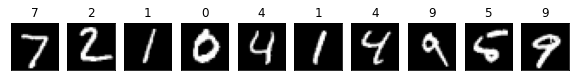

In [ ]:
fig, axes = plt.subplots(ncols=10,sharey = True, sharex = True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
 
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = Sequential([Flatten(input_shape=(28,28)),Dense(10, activation='sigmoid'),Dense(10, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3925      
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=20, 
          validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2302 - acc: 0.6609 - val_loss: 0.7987 - val_acc: 0.7997
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7182 - acc: 0.7971 - val_loss: 0.6072 - val_acc: 0.8270
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6269 - acc: 0.8196 - val_loss: 0.6427 - val_acc: 0.8031
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - acc: 0.8206 - val_loss: 0.5633 - val_acc: 0.8285
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5406 - acc: 0.8380 - val_loss: 0.5481 - val_acc: 0.8385
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5318 - acc: 0.8440 - val_loss: 0.5165 - val_acc: 0.8497
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5165 - acc: 0.8476 - val_loss: 0.4850 - val_acc: 0.8671
Epoch 8/20
1875/1875 [==============================] - 5s 2ms

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


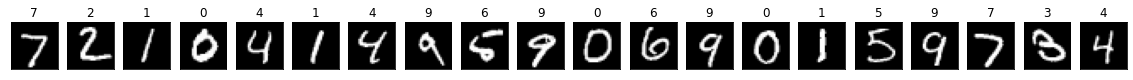

In [ ]:
 
fig, axes = plt.subplots(ncols=20,figsize=(20, 4))
for i in range(0,20):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()